# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

# cities

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print(weather_api_key)

0bc177b1bceda5e559f12caa6d6723af


In [8]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"

print("Beginning Data Retrieval")
print("-------------------------")
i = 0
valid_cities = []
for city in cities:
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
#     print(query_url)
    try:
        response = requests.get(query_url).json()
        testcon = response['clouds']['all']
        i = i + 1
        iset = int(i/50) + 1
        cityid = i - ((iset - 1) * 50)
        print(f"Processing Record {cityid} of Set {iset} | {city}")
        valid_cities.append(city)
    except (KeyError, IndexError):
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")
print(query_url)

Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | codrington
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | union de san antonio
Processing Record 5 of Set 1 | butaritari
City not found. Skipping...
City not found. Skipping...
Processing Record 6 of Set 1 | los llanos de aridane
Processing Record 7 of Set 1 | moron
City not found. Skipping...
Processing Record 8 of Set 1 | sao felix do xingu
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | lavrentiya
Processing Record 11 of Set 1 | redmond
Processing Record 12 of Set 1 | hithadhoo
Processing Record 13 of Set 1 | paita
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | torbay
Processing Record 16 of Set 1 | butterworth
Processing Record 17 of Set 1 | norman wells
Processing Record 18 of Set 1 | vaini
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | cape town
Process

Processing Record 32 of Set 4 | makakilo city
Processing Record 33 of Set 4 | rawson
Processing Record 34 of Set 4 | lakota
City not found. Skipping...
Processing Record 35 of Set 4 | verkhnyaya inta
City not found. Skipping...
Processing Record 36 of Set 4 | ribeira grande
Processing Record 37 of Set 4 | sitka
Processing Record 38 of Set 4 | wanning
City not found. Skipping...
Processing Record 39 of Set 4 | saint-augustin
Processing Record 40 of Set 4 | tolaga bay
Processing Record 41 of Set 4 | russell
Processing Record 42 of Set 4 | north bend
Processing Record 43 of Set 4 | bandraboua
Processing Record 44 of Set 4 | suntar
Processing Record 45 of Set 4 | bluefield
Processing Record 46 of Set 4 | dikson
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | wiarton
Processing Record 49 of Set 4 | tuatapere
Processing Record 0 of Set 5 | poopo
Processing Record 1 of Set 5 | ughelli
Processing Record 2 of Set 5 | mandalgovi
Processing Record 3 of Set 5 | sheksna
Proce

Processing Record 23 of Set 8 | neuquen
Processing Record 24 of Set 8 | high prairie
Processing Record 25 of Set 8 | molchanovo
City not found. Skipping...
Processing Record 26 of Set 8 | caruray
Processing Record 27 of Set 8 | aksarka
Processing Record 28 of Set 8 | bud
Processing Record 29 of Set 8 | dawei
Processing Record 30 of Set 8 | gorontalo
Processing Record 31 of Set 8 | hassleholm
Processing Record 32 of Set 8 | marakkanam
Processing Record 33 of Set 8 | anaco
Processing Record 34 of Set 8 | puri
Processing Record 35 of Set 8 | villamontes
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | xingyi
Processing Record 38 of Set 8 | qandala
Processing Record 39 of Set 8 | asfi
Processing Record 40 of Set 8 | varena
Processing Record 41 of Set 8 | paamiut
Processing Record 42 of Set 8 | luderitz
Processing Record 43 of Set 8 | baykit
Processing Record 44 of Set 8 | caidian
Processing Record 45 of Set 8 | mount gambier
Processing Record 46 of Set 8 | denpasar
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
response

{'coord': {'lon': -49.7158, 'lat': -25.7697},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 286.62,
  'feels_like': 286.58,
  'temp_min': 286.62,
  'temp_max': 286.62,
  'pressure': 1015,
  'humidity': 98,
  'sea_level': 1015,
  'grnd_level': 910},
 'visibility': 10000,
 'wind': {'speed': 2.14, 'deg': 342, 'gust': 9.02},
 'rain': {'1h': 2.05},
 'clouds': {'all': 100},
 'dt': 1659931001,
 'sys': {'country': 'BR', 'sunrise': 1659952365, 'sunset': 1659992181},
 'timezone': -10800,
 'id': 3458826,
 'name': 'Lapa',
 'cod': 200}

In [22]:
# Loading valid cities into dataframe
city_pd = pd.DataFrame({'city': valid_cities})

city_pd['Lat'] = ""
city_pd['Lng'] = ""
city_pd['Max Temp'] = ""
city_pd['Humidity'] = ""
city_pd['Cloudiness'] = ""
city_pd['Wind Speed'] = ""
city_pd['Country'] = ""
city_pd['Date'] = ""

for index, row in city_pd.iterrows():
    city = row['city']
#     city_index = index['city']
#     print(city)
#     print(city_index)
    query_url = weather_url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    city_pd.loc[index, 'Lat'] = response['coord']['lat']
    city_pd.loc[index, 'Lng'] = response['coord']['lon']
    city_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
    city_pd.loc[index, 'Humidity'] = response['main']['humidity']
    city_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
    city_pd.loc[index, 'Wind Speed'] = response['wind']['speed']
    city_pd.loc[index, 'Country'] = response['sys']['country']
    city_pd.loc[index, 'Date'] = response['dt']
city_pd.to_csv(index=False)
city_pd.head()
# len(city_pd)

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,285.87,55,8,1.5,AU,1659932146
1,rikitea,-23.1203,-134.9692,294.44,77,100,16.51,PF,1659932146
2,port alfred,-33.5906,26.891,287.14,99,88,0.45,ZA,1659932112
3,union de san antonio,21.1,-101.9667,289.85,68,91,1.65,MX,1659932148
4,butaritari,3.0707,172.7902,300.76,75,92,5.43,KI,1659932148


In [34]:
# import os  
# os.makedirs('Intro_files/output_data', exist_ok=True)  
city_pd.to_csv('cities_pd.csv', index=False)  

# city_pd.to_csv(city_pd.csv)


In [35]:
city_statistics = city_pd[['Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']]

# Change columns type to numbers for statistics calculations

city_statistics = city_statistics.astype({"Lat": 'float64', 
                                          "Lng": 'float64', 
                                          "Max Temp": 'float64', 
                                          "Humidity": 'float64', 
                                          "Cloudiness": 'float64', 
                                          "Wind Speed": 'float64',
                                          "Date": 'int64'})
city_statistics.describe(include='all')

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,20.255573,11.996968,293.470955,72.745946,53.192793,3.528595,1.659933e+09
std,33.297522,89.310713,7.806989,19.971332,38.553596,2.589859,2.287483e+02
min,-54.800000,-175.200000,273.650000,1.000000,0.000000,0.000000,1.659932e+09
25%,-4.924750,-67.238200,287.740000,63.000000,15.000000,1.540000,1.659933e+09
50%,22.285500,14.333300,294.460000,76.000000,57.000000,2.920000,1.659933e+09
75%,49.718400,83.867950,299.175000,88.000000,95.000000,4.925000,1.659933e+09
max,78.218600,179.316700,311.220000,100.000000,100.000000,16.510000,1.659933e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [37]:
# Check for cities with humidity over 100%
extreme_humidity = False
city_pd = city_pd.astype({"Lat": 'float64', 
                          "Lng": 'float64', 
                          "Max Temp": 'float64', 
                          "Humidity": 'float64', 
                          "Cloudiness": 'float64', 
                          "Wind Speed": 'float64',
                          "Date": 'int64'})

city_humidity_data = city_pd.loc[(city_pd['Humidity']) <= 100 , :]
if (len(city_humidity_data) == len(city_pd)):
    print("No cities with humidity over 100% found")
else:
    city_high_humidity = city_pd.loc[(city_pd['Humidity']) > 100 , :]
    extreme_humidity = True
    print(f"{len(city_pd)-len(city_data)} cities with humidity over 100% found")
    city_statistics.describe(include='all')

No cities with humidity over 100% found


In [38]:
#  Get the indices of cities that have humidity over 100%.
if extreme_humidity == True:
    city_high_humidity

In [39]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data
clean_city_data.head()

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,codrington,-38.2667,141.9667,285.87,55.0,8.0,1.50,AU,1659932146
1,rikitea,-23.1203,-134.9692,294.44,77.0,100.0,16.51,PF,1659932146
2,port alfred,-33.5906,26.8910,287.14,99.0,88.0,0.45,ZA,1659932112
3,union de san antonio,21.1000,-101.9667,289.85,68.0,91.0,1.65,MX,1659932148
4,butaritari,3.0707,172.7902,300.76,75.0,92.0,5.43,KI,1659932148


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [41]:
max_temp_f = []
for i in clean_city_data['Max Temp']:
    max_temp_f.append(1.8*(i - 273)+32)
clean_city_data['Max Temp F'] = max_temp_f
max_temp_f

[55.16600000000001,
 70.592,
 57.45199999999998,
 62.33000000000004,
 81.96799999999999,
 68.01799999999999,
 50.233999999999995,
 77.35999999999999,
 71.97799999999997,
 38.858000000000004,
 78.99800000000002,
 81.57200000000003,
 63.64399999999998,
 61.682000000000016,
 69.85399999999996,
 89.924,
 57.50600000000003,
 79.23200000000003,
 59.792,
 56.53399999999999,
 44.88800000000005,
 59.288000000000046,
 67.28000000000004,
 76.51400000000004,
 80.07799999999997,
 75.092,
 67.00999999999999,
 58.567999999999984,
 70.39399999999998,
 68.684,
 79.39399999999998,
 84.03800000000004,
 96.22400000000002,
 55.59800000000003,
 83.62400000000002,
 68.21600000000001,
 86.25199999999998,
 73.72400000000002,
 75.00199999999998,
 85.15399999999995,
 52.069999999999965,
 77.12599999999999,
 57.542,
 61.141999999999996,
 99.24800000000003,
 75.57799999999997,
 82.52599999999998,
 33.727999999999966,
 72.53599999999997,
 59.55800000000001,
 35.977999999999966,
 33.332000000000015,
 66.559999999999

In [42]:
clean_city_data

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp F
0,codrington,-38.2667,141.9667,285.87,55.0,8.0,1.50,AU,1659932146,55.166
1,rikitea,-23.1203,-134.9692,294.44,77.0,100.0,16.51,PF,1659932146,70.592
2,port alfred,-33.5906,26.8910,287.14,99.0,88.0,0.45,ZA,1659932112,57.452
3,union de san antonio,21.1000,-101.9667,289.85,68.0,91.0,1.65,MX,1659932148,62.330
4,butaritari,3.0707,172.7902,300.76,75.0,92.0,5.43,KI,1659932148,81.968
...,...,...,...,...,...,...,...,...,...,...
550,manggar,-2.8833,108.2667,302.43,67.0,4.0,5.85,ID,1659933135,84.974
551,kolobovo,56.7020,41.3417,291.64,90.0,99.0,2.62,RU,1659933136,65.552
552,kochki,54.3358,80.4806,293.34,64.0,57.0,3.73,RU,1659933137,68.612
553,gangapur,26.4833,76.7167,304.33,59.0,75.0,2.99,IN,1659933138,88.394


In [44]:
today = pd.to_datetime('today').strftime("%d/%m/%y")
invalid_characters = [",", "/", " "]

today

'08/08/22'

## Latitude vs. Temperature Plot

In [51]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Max Temp F'], 2)
x_axis = clean_city_data['Lat']
plt_title = f"City Latitude vs. Max Temperature ({today})"

'City Latitude vs. Max Temperature (08/08/22)'

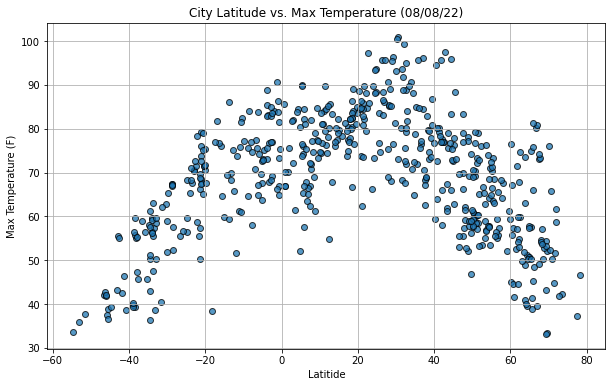

In [55]:
plt.figure(figsize=(10, 6))
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.xlabel("Latitide")
plt.ylabel("Max Temperature (F)")

plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.grid(True)


# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Humidity'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))

plt_title = f"City Latitude vs. Humidity ({today})"
plt.title(plt_title)

plt.xlabel("Latitide")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)
plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Cloudiness'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))

plt_title = f"City Latitude vs. Cloudiness ({today})"
plt.title(plt_title)

plt.xlabel("Latitide")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)

plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
lat_sort = clean_city_data['Lat'].reset_index(drop=True)
x_limit = clean_city_data['Lat'].max()
x_limit_min = int(clean_city_data['Lat'].min())
y_values = np.round(clean_city_data['Wind Speed'], 2)
x_axis = clean_city_data['Lat']
plt.figure(figsize=(10, 6))
plt_title = f"City Latitude vs. Wind Speed ({today})"
plt.title(plt_title)
plt.xlabel("Latitide")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_values, marker="o", facecolors="tab:blue", edgecolors="black", alpha=0.75)

plt.grid(True)

# Removing invalid characters from title to allow title to used as filename
filename = plt_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

## Linear Regression

In [ ]:
import scipy.stats as st
from scipy.stats import linregress
Nth_hemp = clean_city_data.loc[(clean_city_data['Lat']) > 0 , :]
Sth_hemp = clean_city_data.loc[(clean_city_data['Lat']) < 0 , :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
y_axis = Nth_hemp['Max Temp']
latitude = Nth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Max Temperature"
plot_title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(45, 300),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

# Removing invalid characters from title to allow title to used as filename
filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
y_axis = Sth_hemp['Max Temp']
latitude = Sth_hemp['Lat']
correlation = st.pearsonr(latitude, y_axis)
x_label = f"Latitude"
y_label = f"Max Temperature"
plot_title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
(slope, intercept, rvalue, pvalue, stderr) = linregress(latitude, y_axis)
regress_values = (latitude * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(10, 6))
plt.scatter(latitude, y_axis)
plt.plot(latitude, regress_values, "r-")
# plt.annotate(line_eq,(-20, 283),fontsize=12,color="red")
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title(plot_title)
print(f"The r-squared is: {rvalue**2}")
print(f"Line Equation: {line_eq}")

filename = plot_title.replace('.', '')

for invalid_charater in invalid_characters:
    filename = filename.replace(invalid_charater, '_')

plt.savefig("Images/" + filename + ".png", facecolor="white")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression